# Predicting Stock Prices with Linear Regression

To answer the question if we can accurately predict stock prices over time, I'm going to use Stock Price history data from the Quadl API and apply a regression analysis method.

## Check out the Data

### Import Libraries

In [1]:
%pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

### Configure Quandl

In [3]:
# Quandl API Auth
quandl.ApiConfig.api_key = "4y8a83sy37LMxEMMQnRq"

### Get the Data

In [4]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)

In [5]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [84]:
data.tail()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2020-11-25,97.70,99.20,97.50,99.04,NaN,14786.0,1451599.95,None,None,NaN
2020-11-26,99.20,100.52,98.81,99.74,NaN,15074.0,1505214.48,None,None,NaN
2020-11-27,99.81,100.74,99.60,100.10,NaN,10634.0,1066602.61,None,None,NaN
2020-11-30,99.90,101.74,99.90,101.70,NaN,12624.0,1273371.98,None,None,NaN
2020-12-01,102.90,102.90,101.76,101.90,NaN,15426.0,1577983.62,None,None,NaN


In [6]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2988 entries, 2009-03-09 to 2020-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2648 non-null   float64
 1   High                   2981 non-null   float64
 2   Low                    2981 non-null   float64
 3   Close                  2988 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2942 non-null   float64
 6   Turnover               2935 non-null   float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         7 non-null      float64
dtypes: float64(8), object(2)
memory usage: 256.8+ KB


In [7]:
# Get descriptive statistics summary of data set
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2648.000000,2981.000000,2981.000000,2988.000000,11.000000,2.942000e+03,2.935000e+03,7.0
mean,65.991424,69.757746,68.509819,69.079700,-0.070000,3.158713e+06,1.953571e+08,0.0
std,28.013445,28.198972,27.681073,27.983287,0.709761,2.026167e+06,1.205243e+08,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,7.936064e+04,0.0
25%,43.492500,45.800000,44.760000,44.970000,-0.500000,2.027710e+06,1.314660e+08,0.0
50%,58.735000,61.500000,60.640000,61.000000,-0.290000,2.711029e+06,1.711970e+08,0.0
75%,82.350000,92.240000,90.620000,91.422500,0.085000,3.767555e+06,2.263262e+08,0.0
max,142.800000,143.240000,141.080000,142.340000,1.250000,3.645671e+07,1.376505e+09,0.0


In [8]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [9]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [10]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [11]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2988 non-null   datetime64[ns]
 1   Close   2988 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.8 KB


In [12]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

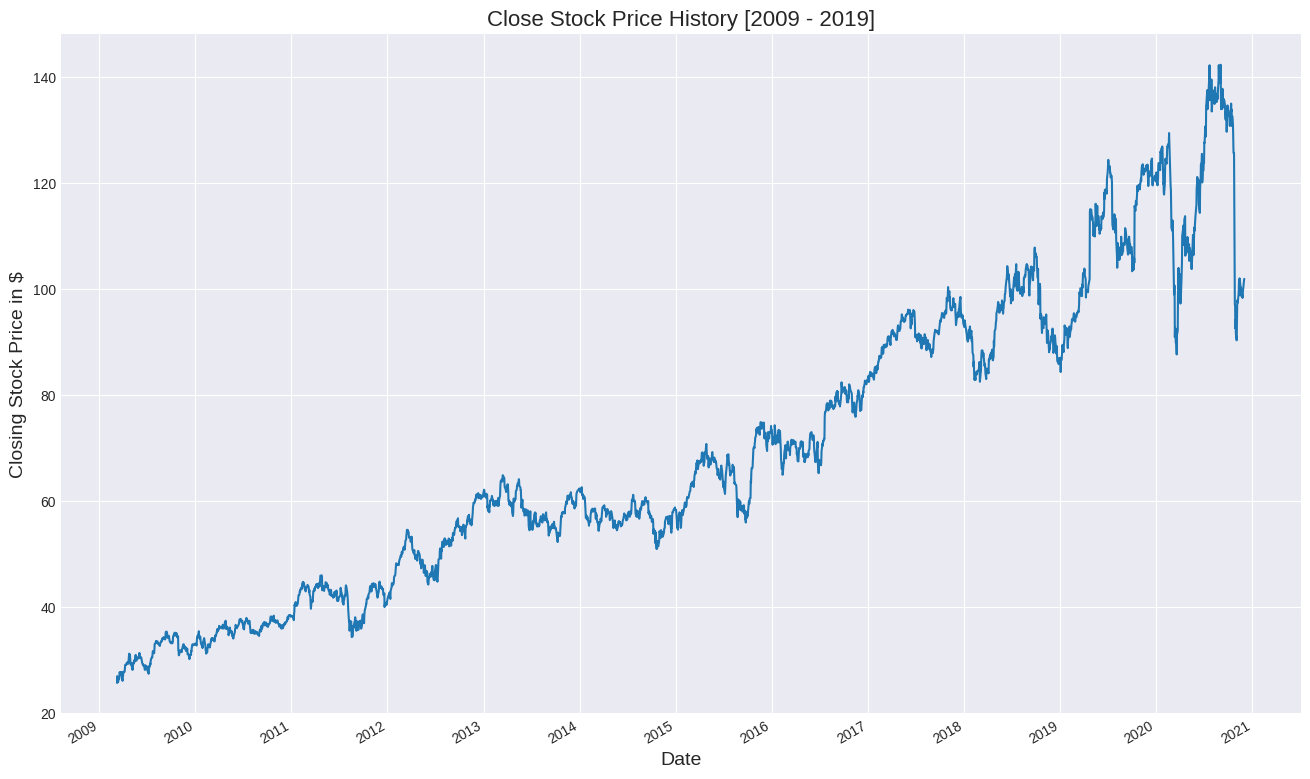

In [13]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
#fig, ax = plt.subplots()
#ax.plot(df['Date'], df['Close'])
fig, ax = plt.subplots()
back = np.array(df['Date'])
front = np.array(df['Close'])
ax.plot(back, front)
# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression

Our data contains only one **independent variable ($X$)** which represents the *date* and the **dependent variable ($Y$)** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a **Simple Linear Regression**.

The best fit line can be described with  
$$
Y = \beta_0 + \beta_1 X
$$

where  
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

### Training a Linear Regression Model

### Train Test Split

In [14]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [15]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [16]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [17]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [18]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [19]:
# The coefficient
print('Slope: ', np.squeeze(model.coef_).item())
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.031053972799669816
Intercept:  22.634986853393322


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0310 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

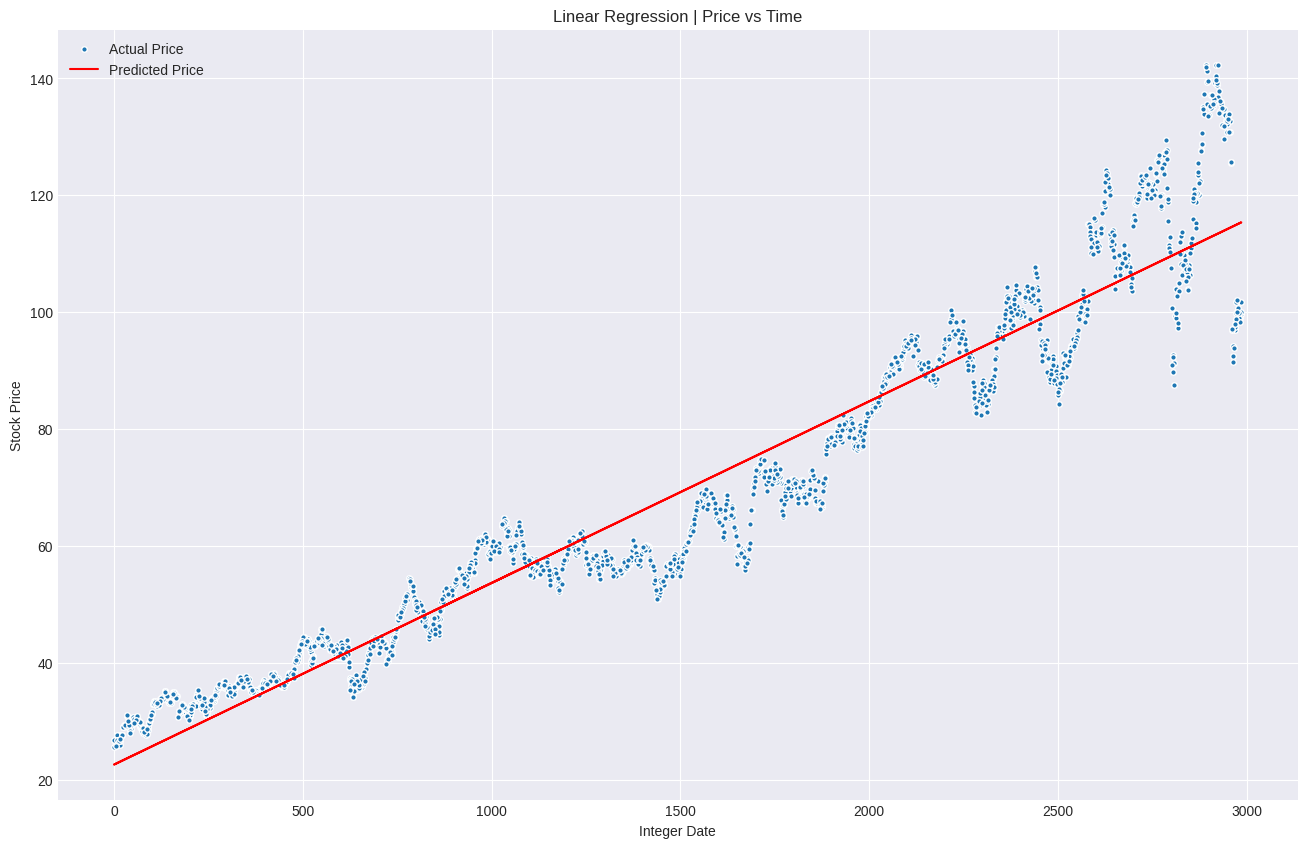

In [20]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [21]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [22]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [23]:
# Get number of rows in data set for random sample
df.shape

(2988, 2)

In [24]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [25]:
df_sample.head()

,Date,Close
31,2009-04-21,29.23
293,2010-04-26,37.34
323,2010-06-07,36.15
649,2011-09-12,35.60
667,2011-10-06,38.98


We can see some larger variations between predicted and actual values in the random sample.  
Let's see how the model performed over the whole test data set.

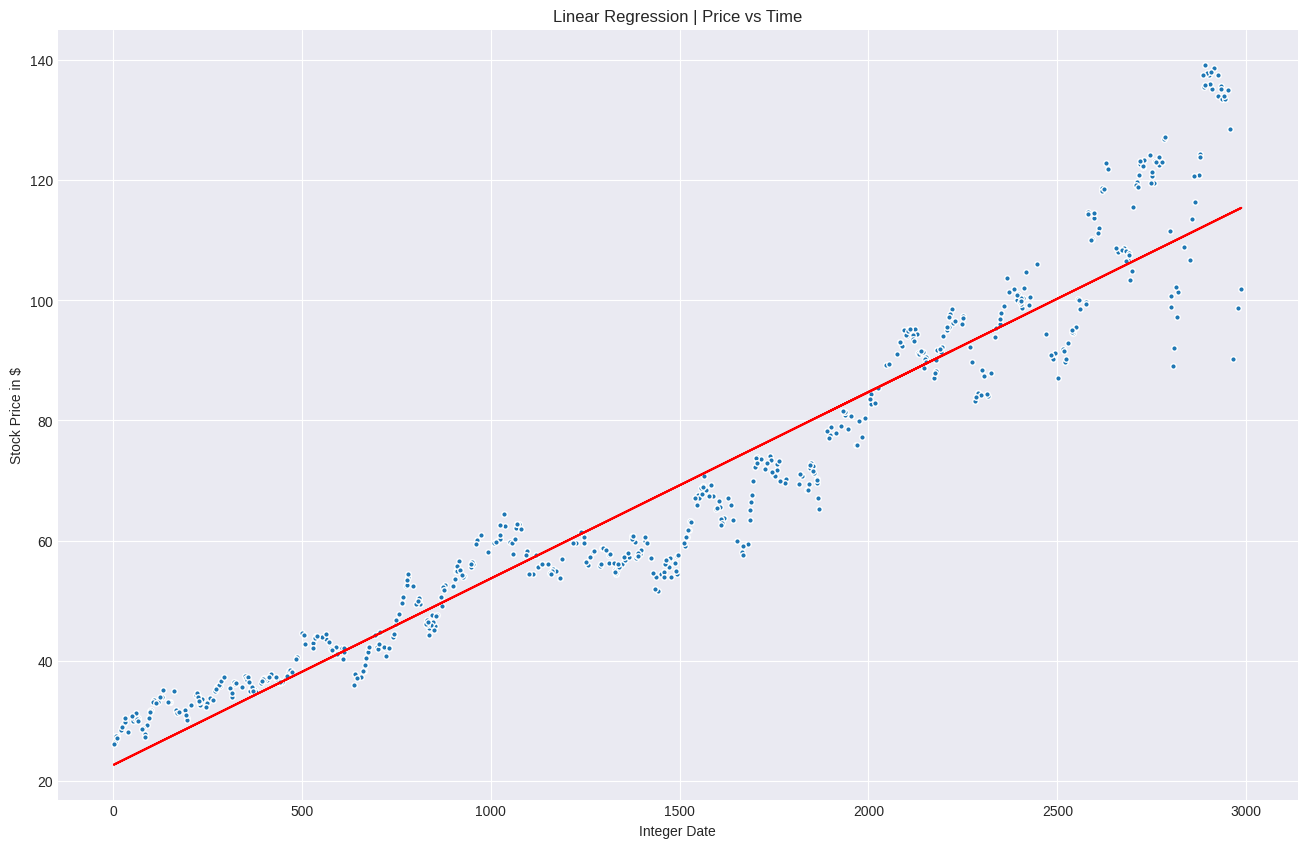

In [27]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

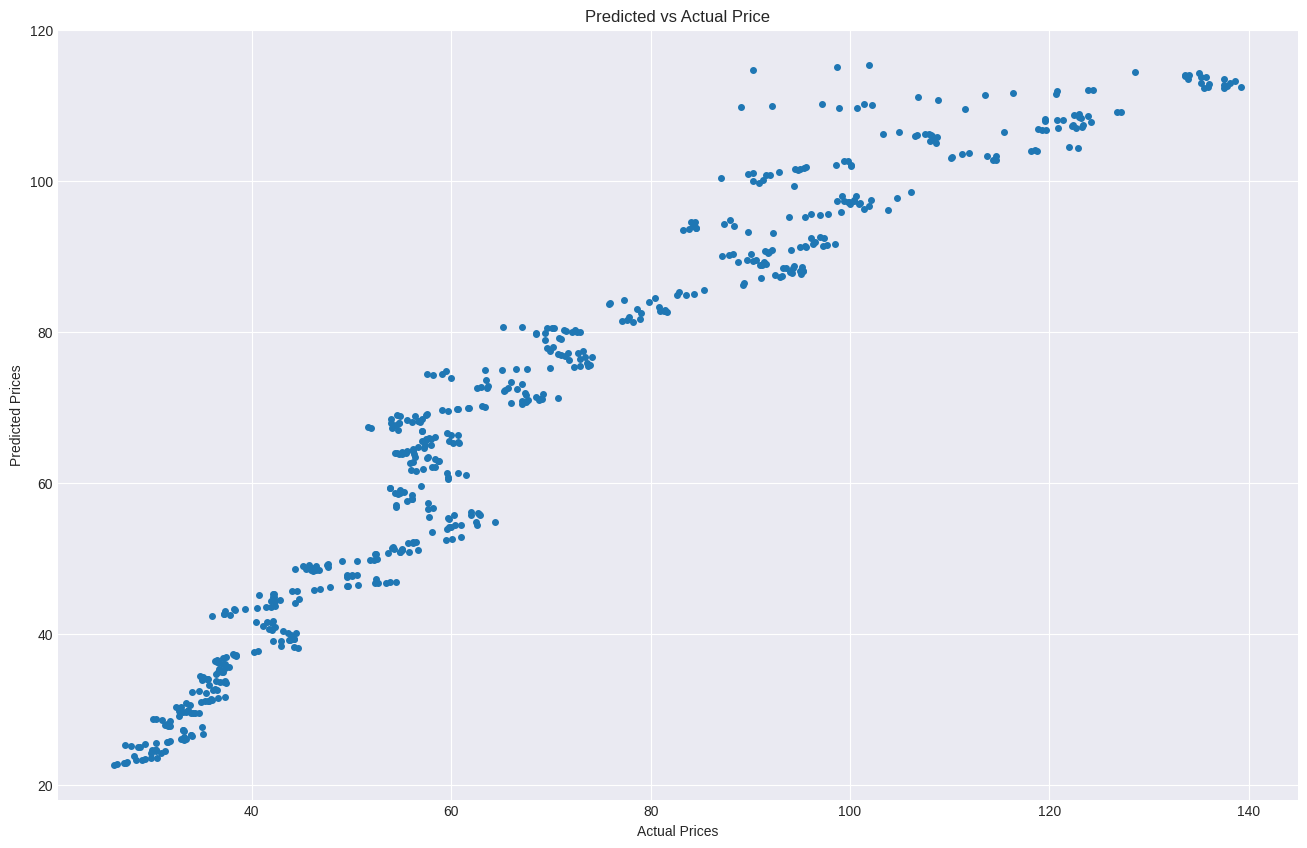

In [28]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

#### Residual Histogram

The residuals are nearly normally distributed around zero.

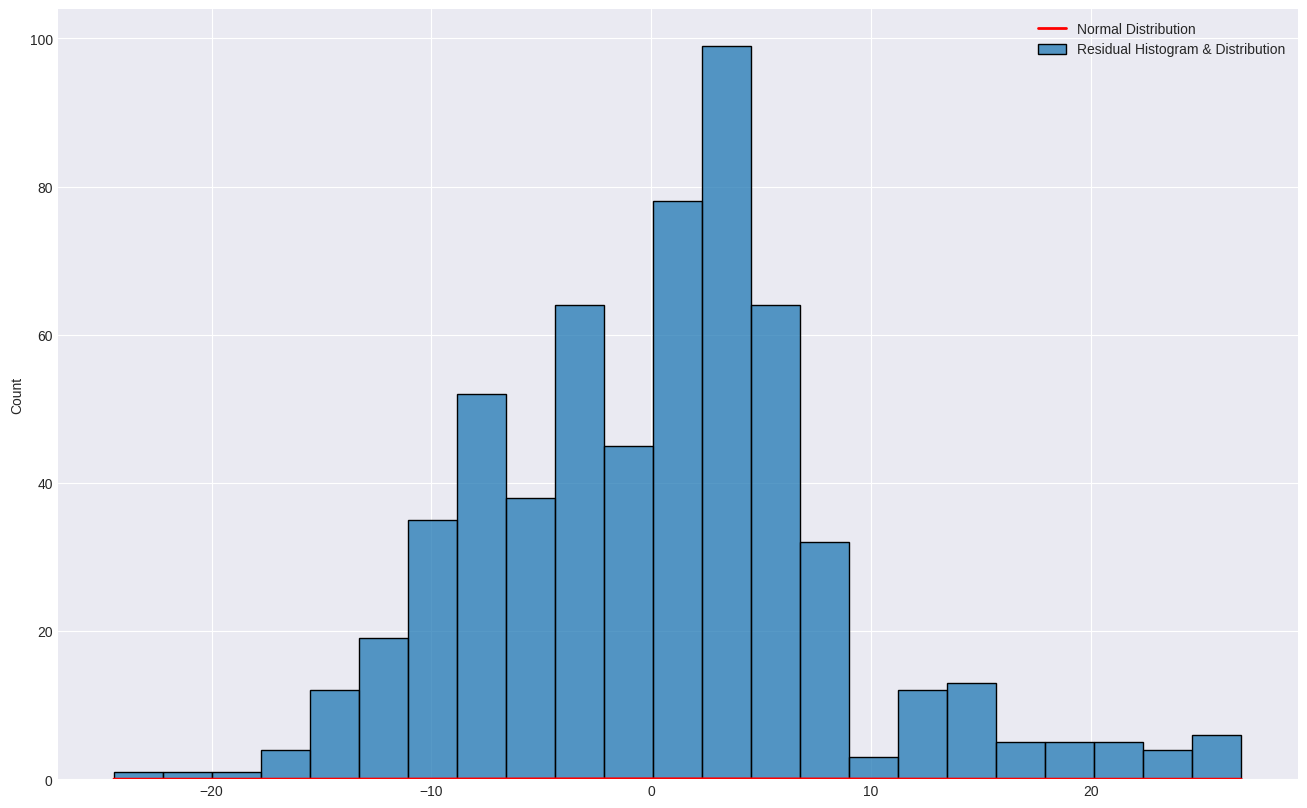

In [30]:
from scipy.stats import norm

# Assuming y_pred and y_test are NumPy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

# Create a histogram with seaborn
ax = sns.histplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# Plot the fitted normal distribution on the same axes as the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [31]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [32]:
df.head()

,Date,Close,Prediction
0,2009-03-09,25.59,22.634987
1,2009-03-10,26.87,22.666041
2,2009-03-11,26.64,22.697095
3,2009-03-12,26.18,22.728149
4,2009-03-13,25.73,22.759203


### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are **cost functions** we want to minimize.

In [33]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [34]:
# Statistical summary of test data
df['Close'].describe()

count    2988.000000
mean       69.079700
std        27.983287
min        25.590000
25%        44.970000
50%        61.000000
75%        91.422500
max       142.340000
Name: Close, dtype: float64

In [35]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.16470900626736
Mean Squared Error: 63.11179538167979
Root Mean Squared Error: 7.9442932587914825


* The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

### Accuracy Evaluation Metrics

To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is accounted for by the model.

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$


In [36]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9240415831723937


In [37]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9241709137536518

The value of $R^2$ shows that are model accounts for nearly 92% of the differences between the actual stock prices and the predicted prices.

# Predicting Stock Prices with LSTM

### Stock Market Prediction And Forecasting Using Stacked LSTM

Keras and Tensorflow >2.0

In [38]:
# Data Collection
import pandas_datareader as pdr
key="4ff2f73f24aa6124b4de2a79dd9c5b38318a403d"

In [39]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/tmp/ipykernel_4865/1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [40]:
df.to_csv('AAPL.csv')

In [42]:
df=pd.read_csv('AAPL.csv')

In [43]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-01-15 00:00:00+00:00,153.07,153.39,150.05,150.27,28710324,36.728409,36.805192,36.003775,36.056563,114841296,0.0,1.0
1,AAPL,2019-01-16 00:00:00+00:00,154.94,155.88,153.00,153.08,30569706,37.177107,37.402655,36.711613,36.730809,122278824,0.0,1.0
2,AAPL,2019-01-17 00:00:00+00:00,155.86,157.66,153.26,154.20,29821160,37.397857,37.829758,36.773999,36.999548,119284640,0.0,1.0
3,AAPL,2019-01-18 00:00:00+00:00,156.82,157.88,155.98,157.50,33751023,37.628204,37.882546,37.426650,37.791367,135004092,0.0,1.0
4,AAPL,2019-01-22 00:00:00+00:00,153.30,156.73,152.62,156.41,30393970,36.783597,37.606609,36.620434,37.529826,121575880,0.0,1.0


In [44]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2024-01-08 00:00:00+00:00,185.56,185.60,181.50,182.085,59144470,185.56,185.60,181.50,182.085,59144470,0.0,1.0
1254,AAPL,2024-01-09 00:00:00+00:00,185.14,185.15,182.73,183.920,42841809,185.14,185.15,182.73,183.920,42841809,0.0,1.0
1255,AAPL,2024-01-10 00:00:00+00:00,186.19,186.40,183.92,184.350,46792908,186.19,186.40,183.92,184.350,46792908,0.0,1.0
1256,AAPL,2024-01-11 00:00:00+00:00,185.59,187.05,183.62,186.540,49128408,185.59,187.05,183.62,186.540,49128408,0.0,1.0
1257,AAPL,2024-01-12 00:00:00+00:00,185.92,186.74,185.19,186.060,40477782,185.92,186.74,185.19,186.060,40477782,0.0,1.0


In [45]:
df1=df.reset_index()['close']

In [46]:
df1

0       153.07
1       154.94
2       155.86
3       156.82
4       153.30
         ...  
1253    185.56
1254    185.14
1255    186.19
1256    185.59
1257    185.92
Name: close, Length: 1258, dtype: float64

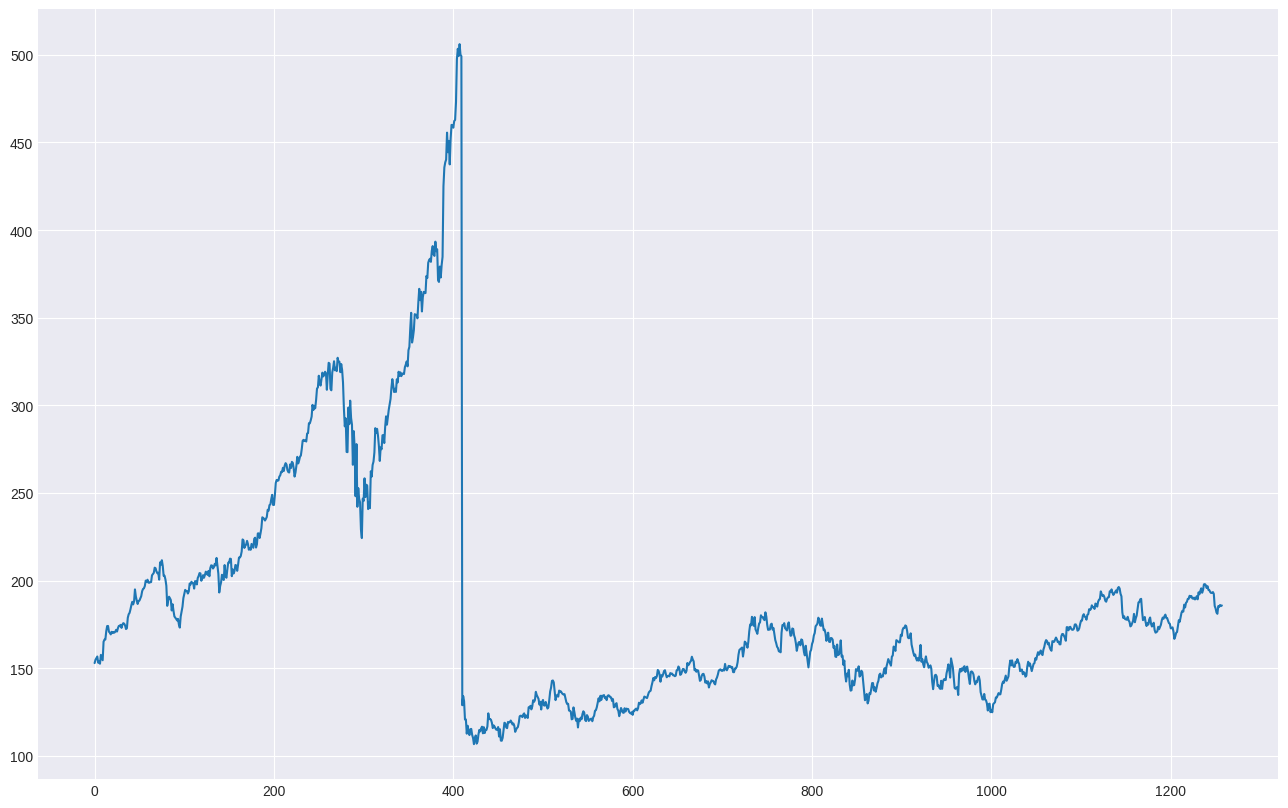

In [47]:
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [49]:
df1

0       153.07
1       154.94
2       155.86
3       156.82
4       153.30
         ...  
1253    185.56
1254    185.14
1255    186.19
1256    185.59
1257    185.92
Name: close, Length: 1258, dtype: float64

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [51]:
print(df1)

[[0.11579211]
 [0.12047589]
 [0.12278021]
 ...
 [0.19874765]
 [0.19724483]
 [0.19807138]]


In [52]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [53]:
training_size,test_size

(817, 441)

In [54]:
train_data

array([[1.15792110e-01],
       [1.20475892e-01],
       [1.22780213e-01],
       [1.25184721e-01],
       [1.16368190e-01],
       [1.17921102e-01],
       [1.14865373e-01],
       [1.27539136e-01],
       [1.23882279e-01],
       [1.19824671e-01],
       [1.46299311e-01],
       [1.49279900e-01],
       [1.49480276e-01],
       [1.61327489e-01],
       [1.68666249e-01],
       [1.68816531e-01],
       [1.60551033e-01],
       [1.59223544e-01],
       [1.56768942e-01],
       [1.60425798e-01],
       [1.58647464e-01],
       [1.60200376e-01],
       [1.59248591e-01],
       [1.60525986e-01],
       [1.63281152e-01],
       [1.60851597e-01],
       [1.65635567e-01],
       [1.68791484e-01],
       [1.69041954e-01],
       [1.70394490e-01],
       [1.66086412e-01],
       [1.70644959e-01],
       [1.72849092e-01],
       [1.72047589e-01],
       [1.69517846e-01],
       [1.64458359e-01],
       [1.65485285e-01],
       [1.80488416e-01],
       [1.85522855e-01],
       [1.87526612e-01],


In [55]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [56]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [58]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [59]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-01-14 21:41:54.890058: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 21:41:54.919782: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-14 21:41:55.083433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 21:41:55.083514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 21:41:55.110942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2024-01-14 21:41:58.421897: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


12/12 [==============================] - 4s 119ms/step - loss: 0.0357 - val_loss: 7.6392e-04
Epoch 2/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0161 - val_loss: 0.0049
Epoch 3/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0113 - val_loss: 5.1170e-04
Epoch 4/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0098 - val_loss: 4.9748e-04
Epoch 5/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0102 - val_loss: 0.0018
Epoch 6/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0086 - val_loss: 4.4988e-04
Epoch 7/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0070 - val_loss: 2.8025e-04
Epoch 8/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0063 - val_loss: 9.4013e-04
Epoch 9/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0064 - val_loss: 6.5932e-04
Epoch 10/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0053 -

In [65]:
import tensorflow as tf

In [66]:
tf.__version__

'2.15.0'

Prediction and checking performance metrics

In [67]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [68]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

214.0976298888923

In [70]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

164.75335399216368

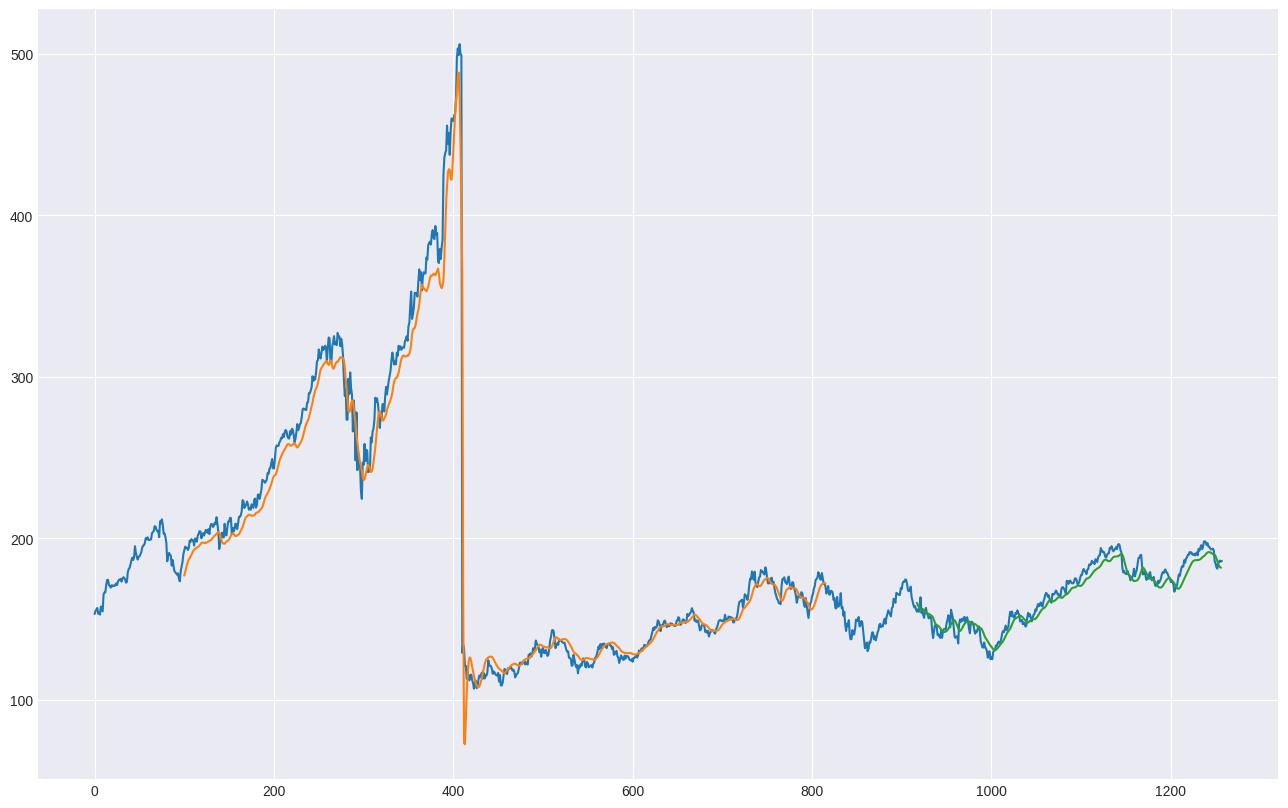

In [71]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

441

In [73]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 101)

In [74]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [75]:
temp_input

[0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,


In [76]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212
 0.17868503 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515
 0.17815905 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517
 0.16310582 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789
 0.16736381 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264
 0.18502192 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226
 0.16541014 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826
 0.15892298 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497
 0.18780213 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852
 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355 0.2115717
 0.2082154  0.20776456 0.20929242 0.20671259 0.20816531 0.21139637
 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548
 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314
 0.22038823 0.22001252 0.21730745 0.21592987 0.2161

2 day output [[0.18543483]]
3 day input [0.17976205 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801
 0.20753914 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621
 0.16874139 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474
 0.16804008 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486
 0.1612273  0.16758923 0.16420789 0.16736381 0.17049468 0.17695679
 0.18071384 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757
 0.1761052  0.17282405 0.17187226 0.16541014 0.16571071 0.16681277
 0.16095178 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026
 0.17715717 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799
 0.19927364 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409
 0.21192235 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242
 0.20671259 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144
 0.2189856  0.22259236 0.21625548 0.22008766 0.22822793 0.22860363
 0.2272511  0.22304321 0.22567314 0.22038823 0.22001252 0.21730745
 0.21592987 0.21618034 0

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [79]:
len(df1)

1258

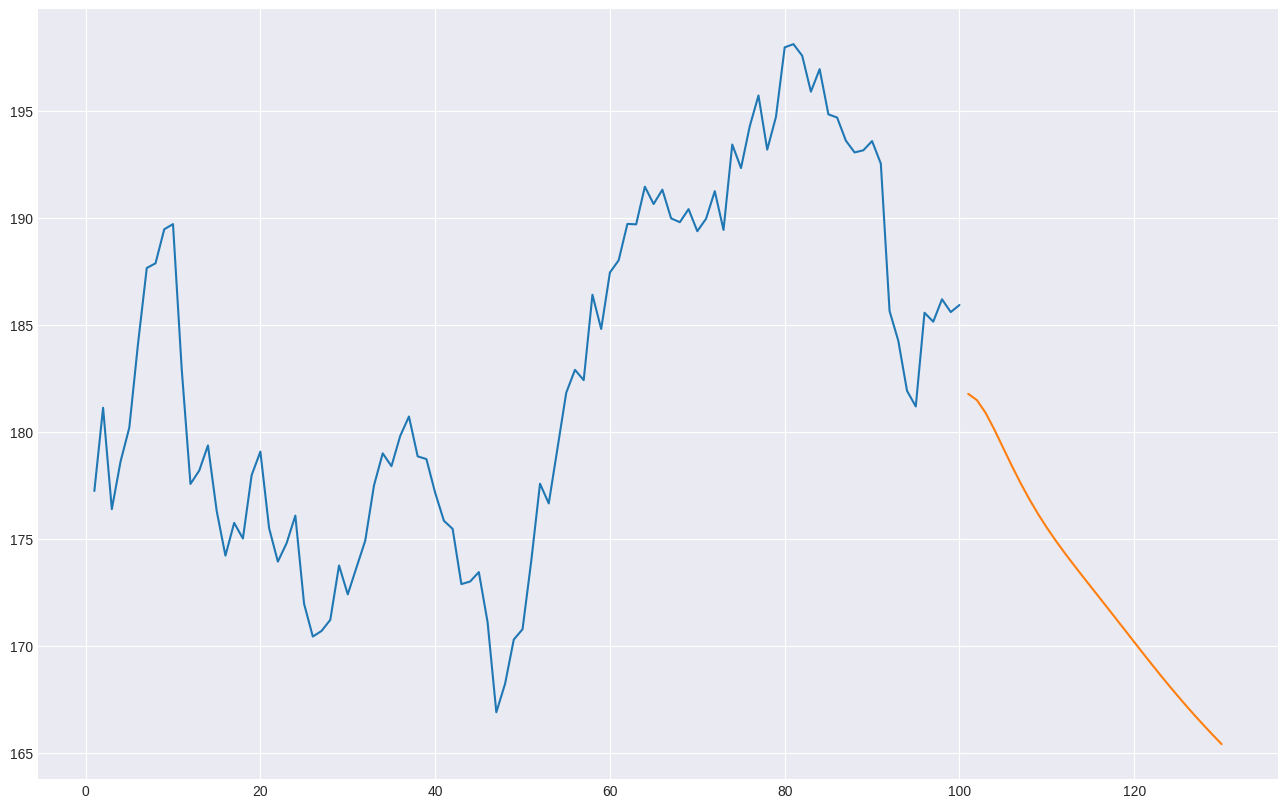

In [80]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

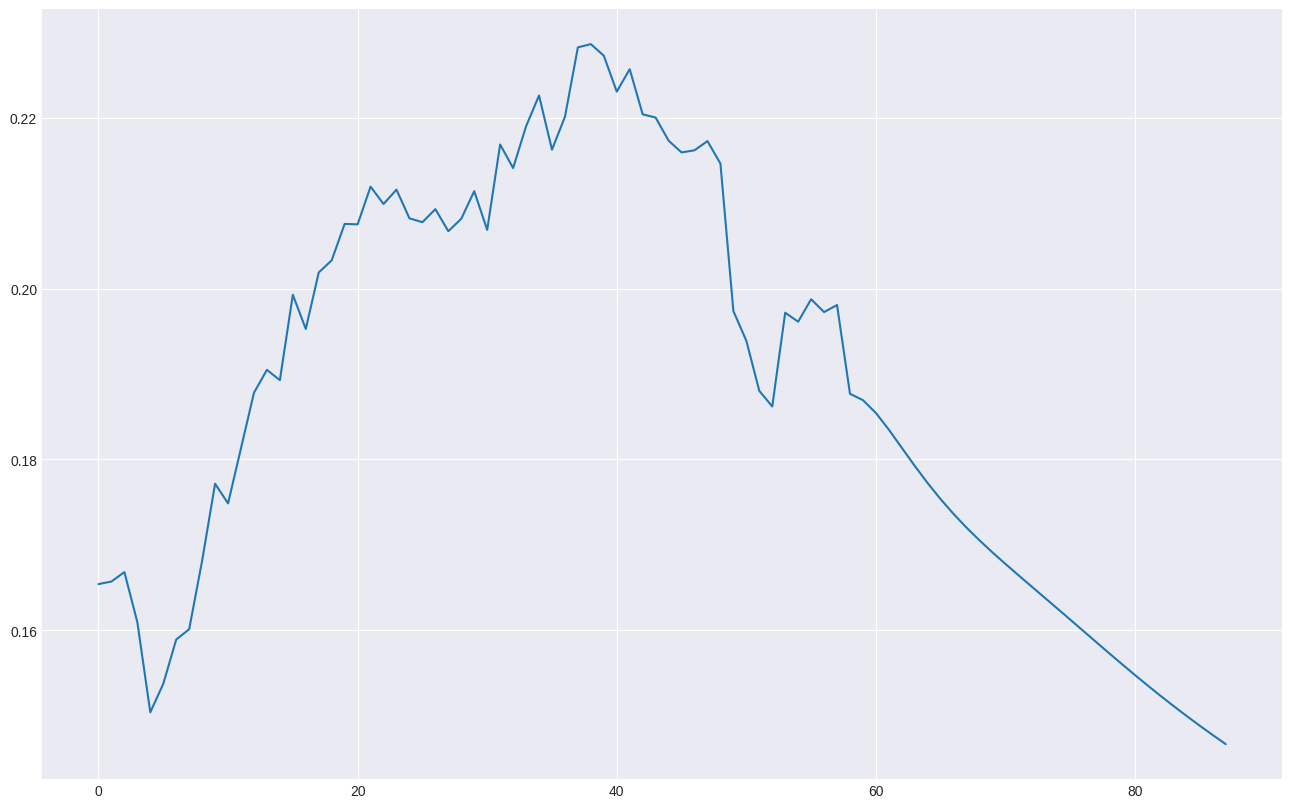

In [81]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

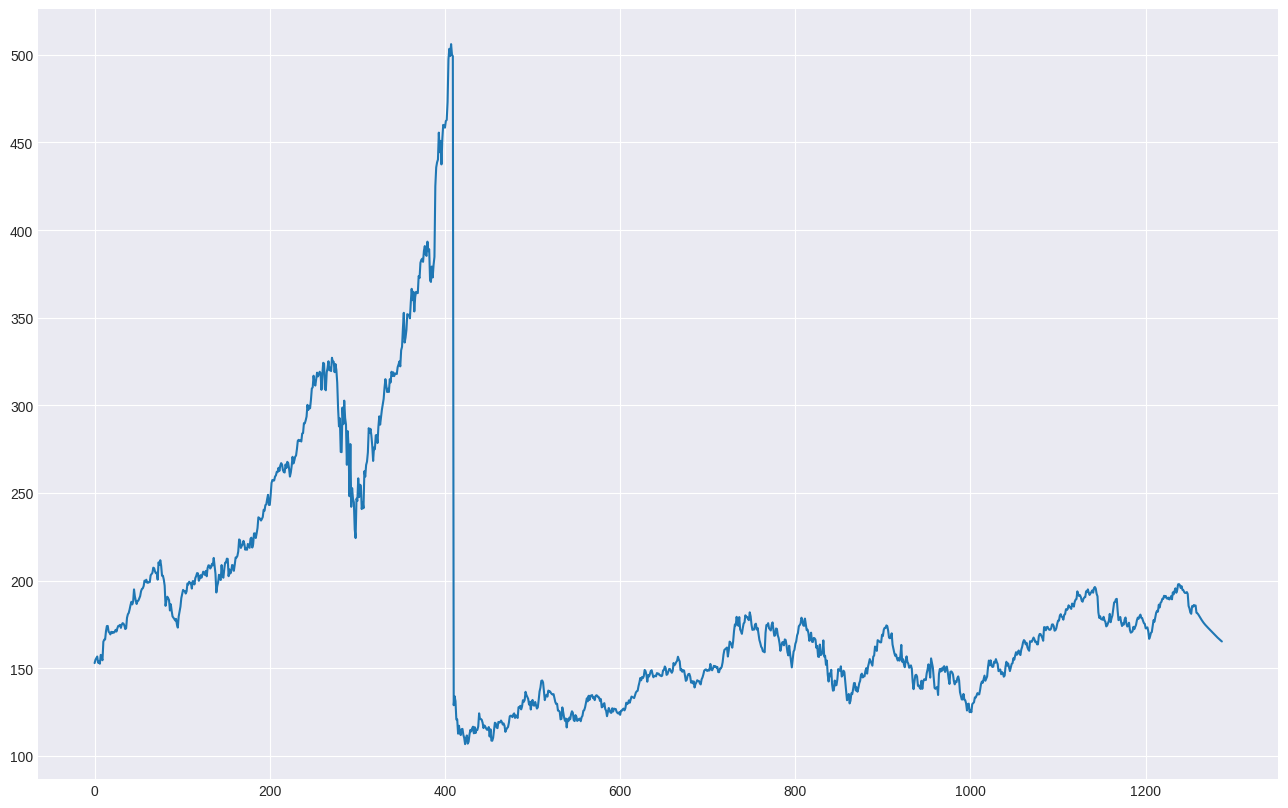

In [83]:
plt.plot(df3)